# Benchmark h-NNE version 2 vs version 1
We compare here the k-nn and trustworthiness scores of h-NNE v2 and v1 as well as their running times on some small datasets. Using the benchmarking script, one can evaluate h-nne on different datasets.

We observe that the h-NNE v2 provides a visualization which spreads better the data and significantly reduces the collapse of large clusters to small areas.

## Setup

In order to run the benchmarking, aside of installing the `hnne` package you need to:

- Install the `hnne_benchmarking` package. To do this:
    - Clone the h-NNE project: `git clone git@github.com:koulakis/h-nne.git`
    - Navigate to the `benchmarking` directory and inside it run `pip install .`
- Download and place the small size h-NNE benchmarking datasets in a directory `<path to data>` of your choice.
    - MNIST and FMNIST will automatically be downloaded there the first time you load them, so nothing to do for those two.
    - For COIL-20, dowload from here the processed dataset: https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php, extract it and copy it to the data path.
    - For shuttle, download the data from here: https://archive.ics.uci.edu/dataset/148/statlog+shuttle, extract and copy its contents to the data path.

In [1]:
import time
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from hnne_benchmarking.data import dataset_loaders, DatasetGroup
from hnne_benchmarking.run_benchmarks import run_eval
from hnne_benchmarking.utils import combine_method_overviews_from_csv

ModuleNotFoundError: No module named 'hnne.v1'

In [2]:
data_path = Path("<path to datasets>")
outputs_path = Path("<path to outputs>")

## Load small, medium or large datasets, see ./hnne/benchmarking/data.py
loaders = dataset_loaders(dataset_group=DatasetGroup.small)
loaders.keys()

dict_keys(['coil_20', 'shuttle', 'mnist', 'fmnist'])

## Run benchmark

Running hnne v1
Loading coil_20...
Finch time: 0.3437577170006989, projection time: 0.48596375299894135
Validating coil_20 on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:00<00:00, 43.79it/s]


Exporting projection plots...
Loading shuttle...
Finch time: 12.964055462998658, projection time: 1.2715988620002463
Validating shuttle on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:21<00:00,  1.89it/s]


Exporting projection plots...
Loading mnist...
Finch time: 2.064328218999435, projection time: 1.2592906880017836
Validating mnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:22<00:00,  1.81it/s]


Exporting projection plots...
Loading fmnist...
Finch time: 1.9611237219978648, projection time: 0.9740975249987969
Validating fmnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:22<00:00,  1.82it/s]


Exporting projection plots...


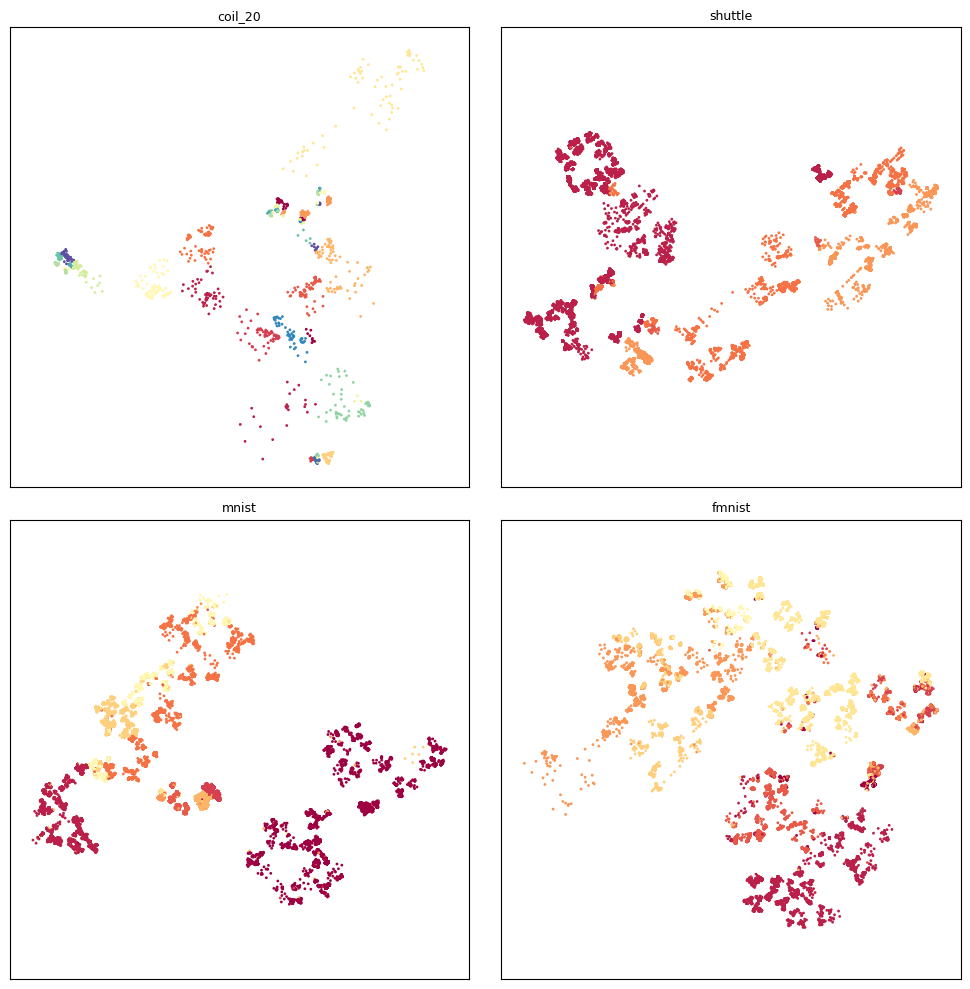

Running hnne v2
Loading coil_20...
Finch time: 0.2740909019994433, projection time: 3.3336207899992587
Validating coil_20 on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:00<00:00, 43.52it/s]


Exporting projection plots...
Loading shuttle...
Finch time: 1.4408326880002278, projection time: 5.128861886001687
Validating shuttle on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:21<00:00,  1.89it/s]


Exporting projection plots...
Loading mnist...
Finch time: 2.0304675870029314, projection time: 2.664777835001587
Validating mnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:21<00:00,  1.83it/s]


Exporting projection plots...
Loading fmnist...
Finch time: 1.9013974980007333, projection time: 1.7624231950030662
Validating fmnist on [1, 3, 5, 10] nearest neighbors...


100%|███████████████████████████████████████████| 40/40 [00:21<00:00,  1.83it/s]


Exporting projection plots...


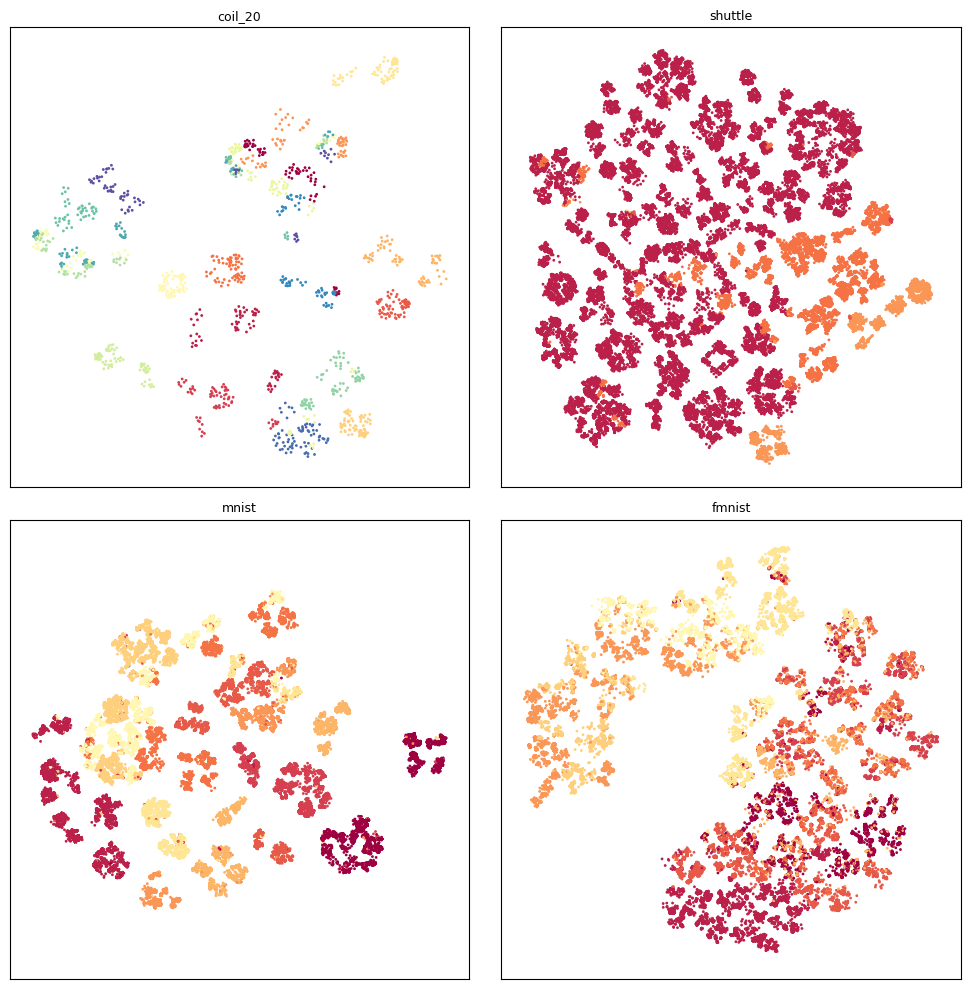

In [3]:
dataset_group = DatasetGroup.small
start_cluster_view='auto'
output_directory = outputs_path / "benchmark_results" / str(dataset_group)
v2_size_threshold = None

for hnne_version in ["v1", "v2"]:
    print(f"Running hnne {hnne_version}")
    experiment_name = f'hnne_v2_packlevel_{start_cluster_view}' if hnne_version == "v2" else 'hnne_v1'
    
    scores, plt = run_eval(
        data_path=data_path,
        dataset_group=dataset_group,
        n_components=2,
        distance="cosine",
        radius=0.4,
        ann_threshold=20_000,
        preliminary_embedding="pca",
        validate_only_1nn=False,     
        compute_trustworthiness=True,
        random_state=42,
        verbose=False,
    
        # hnne v2 params
        prefered_num_clust= None, ## set_ncluster_view ...  
        hnne_version = hnne_version,
        start_cluster_view=start_cluster_view,
        v2_size_threshold=v2_size_threshold,
        
        # Save params
        save_experiment=True,
        plot_projection=True,            
        experiment_name=experiment_name,
        output_directory=output_directory,
        points_plot_limit =5000_000,
        figsize=(5, 5),
        skip_done=False,
        scale_data=False,
    )

## Display the scores of the two versions on different datasets

In [5]:
method_csvs = [
    ("hnne_v1", Path(output_directory, "hnne_v1", "scores","all_datasets_scores.csv")),
    ("hnne_v2", Path(output_directory, "hnne_v2_packlevel_auto", "scores","all_datasets_scores.csv")),
     ]
output_csv_path = Path(output_directory,'combined_overview.csv')
combined_overview = combine_method_overviews_from_csv(
    method_csvs,
    output_csv_path,
    knn_cols=("1-nn", "3-nn", "5-nn", "10-nn"),
    trust_col="trustworthiness",
    proj_time_col="proj_time",
    knn_group_name="KNN accuracy",
)

In [6]:
combined_overview

KNN acc (1-nn)                  KNN acc (3-nn)                  \
                hnne_v1         hnne_v2         hnne_v1         hnne_v2   
coil_20  0.958 (±0.014)  0.944 (±0.018)  0.967 (±0.013)  0.954 (±0.016)   
fmnist   0.815 (±0.003)  0.808 (±0.003)  0.835 (±0.004)  0.831 (±0.004)   
mnist    0.954 (±0.002)  0.950 (±0.002)  0.965 (±0.002)  0.963 (±0.002)   
shuttle  0.998 (±0.001)  0.996 (±0.001)  0.997 (±0.001)  0.996 (±0.001)   

         KNN acc (5-nn)                 KNN acc (10-nn)                  \
                hnne_v1         hnne_v2         hnne_v1         hnne_v2   
coil_20  0.954 (±0.009)  0.947 (±0.018)  0.909 (±0.026)  0.927 (±0.021)   
fmnist   0.839 (±0.003)  0.837 (±0.002)  0.838 (±0.005)  0.836 (±0.004)   
mnist    0.965 (±0.002)  0.964 (±0.002)  0.963 (±0.002)  0.962 (±0.002)   
shuttle  0.997 (±0.001)  0.996 (±0.001)  0.996 (±0.001)  0.994 (±0.001)   

        trustworthiness           proj_time          
                hnne_v1   hnne_v2   hnne_v1 hnne_v2  
coil_20        0.987783  0.989720    485 ms      3s  
fmnist         0.956272  0.955036    974 ms      1s  
mnist          0.981963  0.979830        1s      2s  
shuttle        0.969591  0.965223        1s      5s